<a href="https://colab.research.google.com/github/brendhaed/Faculdade-ADS/blob/main/L%C3%B3gica%20e%20Programa%C3%A7%C3%A3o%20de%20Computadores/aula_9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

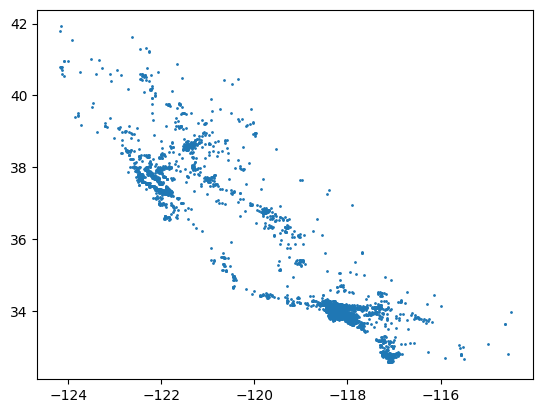

In [2]:
#exemplo 8:plotando dados a partir de um arquivo
import matplotlib.pyplot as plt

def carregaDados(nomeArq):
  aux = []
  with open(nomeArq) as csv:
    csv.readline()
    for linha in csv:
      nova = [float(val) for val in linha.split(",")]
      aux.append(nova)
  return aux

dados = carregaDados("sample_data/california_housing_test.csv")
longitudes = [aux[0] for aux in dados]
latitudes = [aux[1] for aux in dados]

#plt.plot(longitudes,latitudes,'bo')
plt.scatter(longitudes, latitudes,s=1)
plt.show()


In [3]:
#exemplo 10: agrupamento de marcadores
import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[36.7783,-119.4179],
                 zoom_start=6, min_zoom=5)
marker_cluster = MarkerCluster().add_to(map)
for aux in dados:
  folium.CircleMarker(radius=1,location=[aux[1],aux[0]]).add_to(marker_cluster)
map

In [5]:
#exemplo 11: mapa de calor
import folium
from folium.plugins import HeatMap

map = folium.Map(location=[36.7783,-119.4179],
zoom_start = 6, min_zoom=5)
aux2 = [[aux[1],aux[0],aux[7]] for aux in dados]
HeatMap(aux2,min_opacity=0.1).add_to(map)

map

Ângulo:45
Vel. inicial (m/s):10
Altura inicial:0


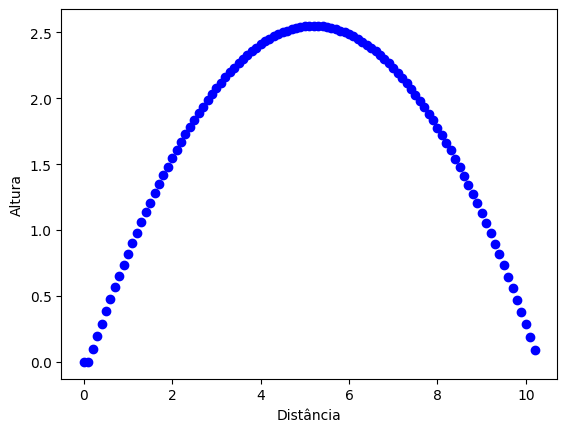

In [8]:
#exemplo 12: lançamento de projétil
import matplotlib.pyplot as plt
import math
g = 9.81
ang = float(input("Ângulo:"))
v0 = float(input("Vel. inicial (m/s):"))
y0 = float(input("Altura inicial:"))

listax = []
listay = []

# Converte ângulo para radianos
ang = math.radians(ang)

y = 0
x = 0
while y >= 0:
  listax.append(x)
  listay.append(y)
  y = x * math.tan(ang) - (1/(2*v0*v0)* g*x*x/math.cos(ang)**2) + y0
  x = x + 0.1

plt.xlabel("Distância")
plt.ylabel("Altura")
plt.plot(listax,listay,'bo')

In [12]:
#exemplo 13.1: fibonacci e sementes do girasol
def fibo(n):
  n1 = 1
  n2 = 1
  print(f"{n1:3}")
  for cont in range(n):
    print(f"{n2:3}: ",end="")
    n1,n2 = n2,n1+n2
    print(f"{n1/n2}")
  print()
fibo(15)

  1
  1: 0.5
  2: 0.6666666666666666
  3: 0.6
  5: 0.625
  8: 0.6153846153846154
 13: 0.6190476190476191
 21: 0.6176470588235294
 34: 0.6181818181818182
 55: 0.6179775280898876
 89: 0.6180555555555556
144: 0.6180257510729614
233: 0.6180371352785146
377: 0.6180327868852459
610: 0.6180344478216818
987: 0.6180338134001252



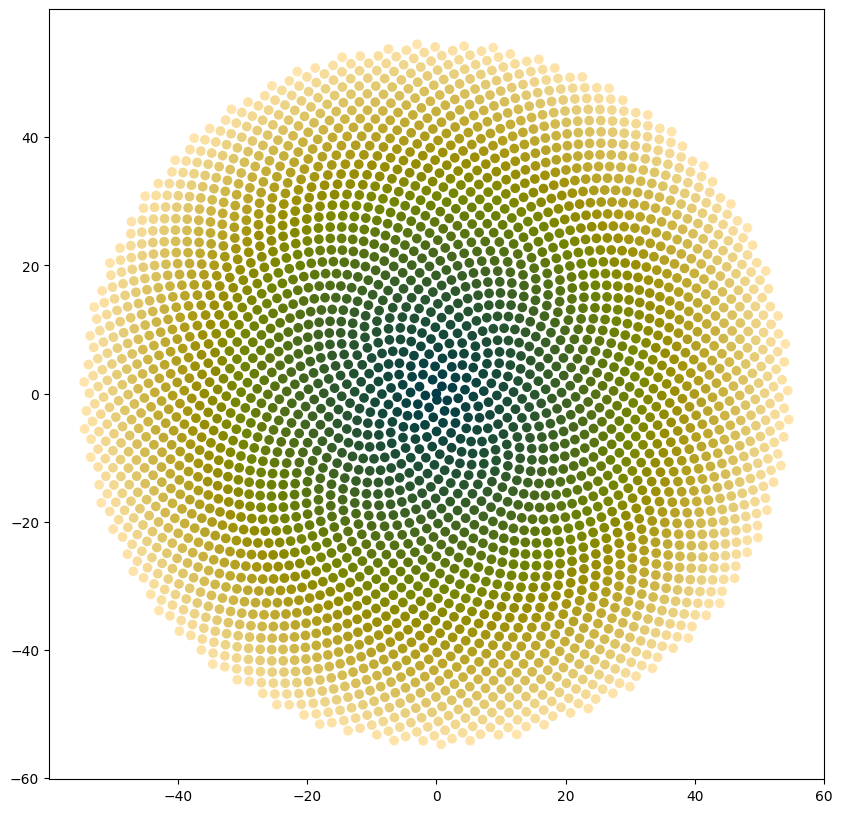

In [11]:
#exemplo 13.2: fibonacci e sementes do girasol
!pip install cmcrameri

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import math

listax = []
listay = []
dists = [] # distâncias ao centro

phi = (1 + math.sqrt(5))/2
angAureo = 360 - 360/phi

ang = 0
for cont in range(3000):
  dist = math.sqrt(cont)
  ang = ang + angAureo
  ang_rad = math.radians(ang)
  x = dist * math.cos(ang_rad)
  y = dist * math.sin(ang_rad)
  listax.append(x)
  listay.append(y)
  dists.append(dist)
plt.figure(figsize=(10,10))
plt.scatter(listax,listay,c=dists,cmap=cmc.bamako)
